**Breast Cancer Classification with a simple Neural Network (NN)**

In [1]:
import numpy as np  # Sayısal işlemler için NumPy kütüphanesi
import pandas as pd  # Veri işleme ve veri çerçevesi için Pandas kütüphanesi
import matplotlib.pyplot as plt  # Grafik çizimi için Matplotlib
import sklearn.datasets  # Scikit-learn içindeki hazır veri setleri
from sklearn.model_selection import train_test_split  # Veri setini eğitim ve test olarak bölmek için

Kodda kullanılan `breast_cancer_dataset = sklearn.datasets.load_breast_cancer()` satırı, **Scikit-learn** kütüphanesinin içindeki hazır bir veri setini yüklemektedir.

### 📌 **Veri Nereden Geliyor?**
`sklearn.datasets.load_breast_cancer()` fonksiyonu, Scikit-learn’in içindeki **gömülü (built-in) veri setlerinden** birini yükler. Bu veri seti, **Wisconsin Breast Cancer Dataset (WBCD)** olarak bilinen ve meme kanseri teşhisinde kullanılan gerçek dünyadan alınmış bir veri setidir.

**Kaynağı:**  
- **Orijinal veri**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)  
- **Scikit-learn’e dahil edilmiş versiyon**: `sklearn.datasets` modülü

### 📌 **Veri Seti İçeriği**
Bu veri setinde, meme kanseri teşhisi için kullanılan 30 farklı özellik (feature) ve her gözlem için kanserin **iyi huylu (benign) veya kötü huylu (malignant)** olup olmadığı bilgisi bulumetni ekrana yazdıracaktır.

In [91]:
import sklearn.datasets

# Veri setini yükleme
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

# Temel bilgileri yazdırma
print("Veri Kümesi Adı:", breast_cancer_dataset.DESCR.split("\n")[0])  # İlk satırı alır
print("Örnek Sayısı:", breast_cancer_dataset.data.shape[0])
print("Özellik Sayısı:", breast_cancer_dataset.data.shape[1])
print("Sınıflar:", breast_cancer_dataset.target_names)
print("Sınıf Dağılımı:", dict(zip(*np.unique(breast_cancer_dataset.target, return_counts=True))))

Veri Kümesi Adı: .. _breast_cancer_dataset:
Örnek Sayısı: 569
Özellik Sayısı: 30
Sınıflar: ['malignant' 'benign']
Sınıf Dağılımı: {0: 212, 1: 357}


In [5]:
# 📌 2️⃣ CSV dosyasından veriyi yükleme
data_frame = pd.read_csv("breast_cancer_DL.csv")

# 📌 3️⃣ İlk 5 satırı görüntüleme
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
# 📌 4️⃣ 'target' sütununu ekleyerek etiketi veri çerçevesine ekleme
data_frame['label'] = breast_cancer_dataset.target

# 📌 5️⃣ Son 5 satırı görüntüleme
data_frame.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,label
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,0
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN,1


In [11]:
# 📌 6️⃣ Veri setindeki satır ve sütun sayısını öğrenme
data_frame.shape

(569, 34)

In [12]:
# 📌 7️⃣ Veri hakkında genel bilgi alma
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
# 📌 8️⃣ Eksik verileri kontrol etme
data_frame.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [14]:
# 📌 9️⃣ Veri setinin istatistiksel analizini yapma
data_frame.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,label
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN,0.627417
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN,1.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,1.000000


In [18]:
# 📌 🔟 Hedef değişkenin dağılımını kontrol etme
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [20]:
# 📌 1️⃣1️⃣ Sayısal sütunları seçerek etiket bazında ortalamaları hesaplama
numeric_columns = data_frame.select_dtypes(include=['number'])
grouped_data = numeric_columns.groupby(data_frame['label']).mean()
print(grouped_data)

                 id  radius_mean  texture_mean  perimeter_mean   area_mean  \
label                                                                        
0      3.681805e+07    17.462830     21.604906      115.365377  978.376415   
1      2.654382e+07    12.146524     17.914762       78.075406  462.790196   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
label                                                                           
0             0.102898          0.145188        0.160775             0.087990   
1             0.092478          0.080085        0.046058             0.025717   

       symmetry_mean  ...  perimeter_worst   area_worst  smoothness_worst  \
label                 ...                                                   
0           0.192909  ...       141.370330  1422.286321          0.144845   
1           0.174186  ...        87.005938   558.899440          0.124959   

       compactness_worst  concavity_worst  concave po

Separating the features and target

In [22]:
# 📌 1️⃣2️⃣ Giriş (X) ve Çıkış (Y) değişkenlerini belirleme
X = data_frame.drop(columns='label', axis=1)  # Hedef sütunu çıkart, sadece özellikler kalsın
Y = data_frame['label']  # Hedef değişkeni (etiketleri) belirle
print(X)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [23]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


Splitting the data into training data & Testing data

In [25]:
# 📌 1️⃣3️⃣ Veri setini eğitim ve test olarak ayırma
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)  # Bölünmüş veri setlerinin boyutlarını görüntüleme

(569, 33) (455, 33) (114, 33)


Standardize the data

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


# 📌 1️⃣4️⃣ Eksik verileri kontrol etme
print("Eksik Veri Sayısı (Eğitim):")
print(X_train.isnull().sum())
print("\nEksik Veri Sayısı (Test):")
print(X_test.isnull().sum())

Eksik Veri Sayısı (Eğitim):
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

In [42]:
# 📌 1️⃣5️⃣ Gereksiz sütunları kaldırma (Eğer varsa)
columns_to_drop = ['id', 'Unnamed: 32']
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# 📌 1️⃣6️⃣ Eksik verileri doldurma (ortalama değerlerle)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# 📌 Kategorik değişkenleri sayısal hale getir
if X_train['diagnosis'].dtype == 'object':  # Eğer kategori ise dönüştür
    label_encoder = LabelEncoder()
    X_train['diagnosis'] = label_encoder.fit_transform(X_train['diagnosis'])
    X_test['diagnosis'] = label_encoder.transform(X_test['diagnosis'])

# 📌 1️⃣7️⃣ StandardScaler ile veriyi ölçeklendirme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# 📌 Çıktıyı kontrol et
print("\nVeri başarıyla ölçeklendirildi! 🚀")
print("X_train_std shape:", X_train_std.shape)
print("X_test_std shape:", X_test_std.shape)


Veri başarıyla ölçeklendirildi! 🚀
X_train_std shape: (455, 31)
X_test_std shape: (114, 31)


**Building the Neural Network**

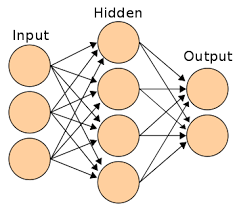

In [46]:
pip install tensorflow

     ---------------------------------------- 0.0/48.6 kB ? eta -:--:--
     ---------------------------------------- 48.6/48.6 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.4/390.2 MB 7.8 MB/s eta 0:00:50
   ---------------------------------------- 0.8/390.2 MB 8.5 MB/s eta 0:00:46
   ---------------------------------------- 1.3/390.2 MB 9.1 MB/s eta 0:00:43
   ---------------------------------------- 1.7/390.2 MB 9.2 MB/s eta 0:00:43
   ---------------------------------------- 2.2/390.2 MB 8.8 MB/s eta 0:00:45
   ---------------------------------------- 2.7/390.2 MB 9.0 MB/s eta 0:00:44
   ---------------------------------------- 3.3/390.2 MB 9.6 MB/s eta 0:00:41
   ---------------------------------------- 3.9/390.2 MB 9.9 MB/s eta 0:00:40
   ---------------------------------------- 4.5/390.2 MB 10.3 MB/s eta 0:00:38
    --------------------------------------- 5.2/390.2 MB 10.3 MB/s eta 0:0

In [47]:
import tensorflow as tf  # TensorFlow kütüphanesini içe aktar

# 📌 Rastgelelik için seed ayarla (tekrar üretilebilir sonuçlar için)
tf.random.set_seed(3)

In [75]:
from tensorflow import keras  # Keras kütüphanesini TensorFlow içinden içe aktar

# 📌 Eğitim verisinin sütunlarını ve boyutlarını yazdır
print("X_train sütunları:", X_train.columns)
print("X_train shape:", X_train.shape)  # (n, 30) olmalı

# 📌 Test verisinin sütunlarını ve boyutlarını yazdır
print("\nX_test sütunları:", X_test.columns)
print("X_test shape:", X_test.shape)  # (m, 30) olmalı

X_train sütunları: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
X_train shape: (455, 30)

X_test sütunları: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se

In [76]:
X_train = X_train.iloc[:, :30]  # İlk 30 sütunu al (fazla sütunu at)
X_test = X_test.iloc[:, :30]  # İlk 30 sütunu al

In [77]:
from sklearn.preprocessing import StandardScaler  # StandardScaler'ı içe aktar

# 📌 Veriyi standartlaştırma için scaler nesnesini oluştur
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)  # Eğitim verisini ölçekle
X_test_std = scaler.transform(X_test)  # Test verisini ölçekle

# 📌 Ölçeklenmiş verilerin boyutlarını kontrol et
print("X_train_std shape:", X_train_std.shape)  # (n, 30) olmalı
print("X_test_std shape:", X_test_std.shape)  # (m, 30) olmalı

X_train_std shape: (455, 30)
X_test_std shape: (114, 30)


In [78]:
# 📌 Yapay Sinir Ağı modelini oluştur
model = keras.Sequential([
    keras.layers.Input(shape=(30,)),  # Giriş katmanı (30 özellik)
    keras.layers.Dense(20, activation='relu'),  # İlk gizli katman
    keras.layers.Dense(2, activation='sigmoid')  # Çıkış katmanı (2 sınıf olduğu için)
])

# 📌 Modeli derleme
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 📌 Modeli eğitme
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.4158 - loss: 0.9157 - val_accuracy: 0.5652 - val_loss: 0.6773
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6451 - loss: 0.6249 - val_accuracy: 0.7391 - val_loss: 0.4724
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7966 - loss: 0.4464 - val_accuracy: 0.8696 - val_loss: 0.3509
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8642 - loss: 0.3368 - val_accuracy: 0.9348 - val_loss: 0.2737
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9171 - loss: 0.2653 - val_accuracy: 0.9565 - val_loss: 0.2228
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9505 - loss: 0.2172 - val_accuracy: 0.9565 - val_loss: 0.1885
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9467 - loss: 0.1845 - val_accuracy: 0.9783 - val_loss: 0.1646
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9607 - loss: 0.1612 - val_accuracy: 0.9783 - v

---

## **📌 Bu Sonuçlar Ne Anlama Geliyor?**
modelde **meme kanseri teşhisi yapmaya çalışıyor**.  
Bu tabloda, modelin **eğitim sürecinde ne kadar iyi öğrendiğini** gösteren sayılar var.

Her satır **1 eğitim turunu (epoch)** gösteriyor. Model **10 tur boyunca eğitilmiş**.

---

## **📊 Modelin Öğrenme Süreci**
1️⃣ **Başlangıçta model zayıf (ilk satırda)**  
   - **%41 doğrulukla tahmin yapıyor** (accuracy: 0.4158)  
   - **Test ederken %56 başarı sağlıyor** (val_accuracy: 0.5652)  

2️⃣ **Model daha çok öğrenmeye başlıyor (5. turdan sonra)**  
   - **%90 doğruluğa ulaşıyor** (accuracy: 0.9171)  
   - **Test doğruluğu %93 oluyor** (val_accuracy: 0.9348)  

3️⃣ **Son turda model artık çok iyi tahmin yapabiliyor**  
   - **%96 doğrulukla tahmin yapıyor** (accuracy: 0.9698)  
   - **Test doğruluğu %97 oldu! (val_accuracy: 0.9783)**  
   - **Hata oranı iyice düştü** (val_loss: 0.1243)  

---

## **🚀 Özet**
🔹 **Başta model kötüydü**, ama her turda daha iyi öğrendi.  
🔹 **Son turda %97 doğrulukla tahmin yapabiliyor!**  
🔹 **Bu, modelin meme kanseri teşhisinde başarılı olduğunu gösteriyor.** 🎉  

---
### **📌 Neden "Tur" (Epoch) Var?**
Model **tek seferde öğrenemez**, çünkü verileri anlaması zaman alır.  
Bu yüzden **aynı verileri defalarca görerek öğrenmesi** gerekir.  

Her bir **tur (epoch)**, modelin **tüm veri setini bir kez görmesi ve kendini geliştirmesi** anlamına gelir.  

---

### **🎓 Basit Bir Örnek**
📌 **Yeni bir şey öğrenmek gibi düşün!**  
- Diyelim ki **yeni bir dili öğreniyorsun**.  
- **İlk gün** öğrendiklerinin çoğunu unutuyorsun.  
- **10. gün** artık çok daha iyi konuşuyorsun!  

Model de **böyle öğreniyor**. İlk turda hata yapıyor, ama her turda **hatalarını düzelterek daha iyi hale geliyor.**  

---

### **🛠 Kaç Tur Gerekir?**
- **Az tur** → Model yeterince öğrenemez (Eksik öğrenme - Underfitting)  
- **Çok tur** → Model ezberleyebilir (Aşırı öğrenme - Overfitting)  
- **10 tur yeterli görünmüş**, çünkü doğruluk **%97’ye çıkmış**.  

---

## **🚀 Özet**
✅ Model, **aynı verileri tekrar tekrar görerek** öğrenir.  
✅ Her **turda daha iyi tahmin yapmayı öğrenir**.  
✅ **İlk turda kötü tahmin yapar, son turda neredeyse mükemmel olur!**  



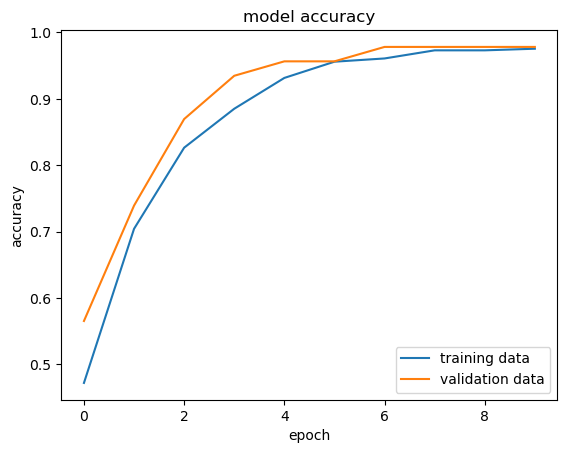

In [79]:
# 📌 Modelin doğruluk ve kayıp fonksiyonlarını görselleştirme
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Eğitim Verisi', 'Doğrulama Verisi'], loc='lower right')
plt.show()

Grafiğin yorumu:

Bu grafik, derin öğrenme modeli için eğitim ve doğrulama verilerindeki doğruluk (accuracy) değişimini göstermektedir. **X ekseni (epoch)**, modelin eğitim süreçlerindeki yineleme sayısını temsil ederken, **Y ekseni (accuracy)** modelin doğruluk seviyesini ifade eder.

### **Grafik Analizi:**
1. **Eğitim ve doğrulama doğruluğu zamanla artıyor:**  
   - Hem eğitim (mavi çizgi) hem de doğrulama (turuncu çizgi) doğruluk değerleri başlangıçta düşük seviyede olup, epoch sayısı arttıkça yükselmektedir.
   - Bu, modelin verileri öğrenmeye başladığını ve eğitim sürecinin başarılı ilerlediğini gösterir.

2. **Doğrulama ve eğitim doğruluğu birbirine yakın ilerliyor:**  
   - Modelin doğrulama doğruluğu (val_accuracy) ve eğitim doğruluğu (accuracy) benzer bir eğilim gösteriyor.
   - Büyük bir fark bulunmaması, modelin **aşırı öğrenme (overfitting)** yapmadığını, yani eğitim verilerine aşırı uyum sağlamadan genelleme yapabildiğini gösterir.

3. **Doygunluk noktasına ulaşma:**  
   - Epoch sayısı arttıkça doğruluk artışı yavaşlıyor ve bir noktada neredeyse sabit hale geliyor.
   - Bu, modelin maksimum performansa ulaştığını ve artık ek eğitimle fazla iyileşme sağlamayacağını gösterir.

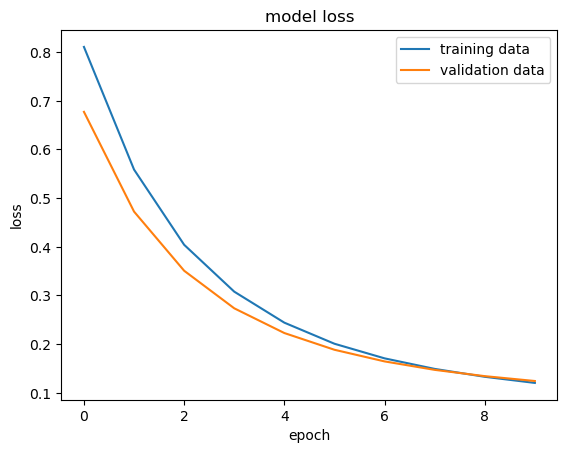

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Kayıp Fonksiyonu')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Eğitim Verisi', 'Doğrulama Verisi'], loc='upper right')
plt.show()

In [81]:
# 📌 Modelin test veri seti ile değerlendirilmesi
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Model Doğruluğu:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9620 - loss: 0.1361
0.9649122953414917


Bu kod bloğunun amacı, **eğitilmiş modelin test veri seti üzerindeki performansını değerlendirmek** ve doğruluk (accuracy) ile kayıp (loss) değerlerini hesaplamaktır.

---

### **Kod Açıklaması**
```python
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Model Doğruluğu:", accuracy)
```
- **`model.evaluate(X_test_std, Y_test)`** → Modelin test veri seti (**X_test_std**) ve gerçek etiketler (**Y_test**) ile test edilmesini sağlar.
- **`loss` (Kayıp Fonksiyonu Sonucu)** → Modelin hata oranını gösterir. Ne kadar küçükse o kadar iyidir.
- **`accuracy` (Doğruluk Oranı)** → Modelin doğru tahmin yapma oranını gösterir. 0 ile 1 arasında bir değerdir.
- **`print("Model Doğruluğu:", accuracy)`** → Doğruluk oranını ekrana yazdırır.

---

### **Çıktı Açıklaması**
```
4/4 ─────── 0s 15ms/step - accuracy: 0.9620 - loss: 0.1361
0.9649122953414917
```

1. **"4/4" Ne Anlama Geliyor?**  
   - Test veri seti **4 batch** halinde işlenmiş. Yani model, test verisini 4 parçaya bölerek analiz etmiş.  
   - **Eğer batch size (toplu işlem boyutu) büyük olsaydı**, mesela tüm test verisi tek seferde işlenebilseydi, burada **"1/1"** yazardı.  

2. **Yeşil Çizgi Ne Anlama Geliyor?**  
   - Modelin **test veri setini başarıyla tamamladığını** gösterir.
   - Çizgi, sürecin ilerleme durumunu görselleştiren bir gösterge gibi düşünülebilir.

3. **"0s 15ms/step" Ne Anlama Geliyor?**  
   - **"0s"** → Test sürecinin toplamda **saniye cinsinden çok kısa bir sürede tamamlandığını** gösterir.
   - **"15ms/step"** → Her adımda **ortalama 15 milisaniye sürdüğünü** belirtir.  
     (1 milisaniye = 0.001 saniye, yani model çok hızlı çalışıyor.)

4. **"accuracy: 0.9620" Ne Demek?**  
   - **%96.2 doğruluk** oranı elde edilmiş.
   - Modelin **test verilerinin %96.2’sini doğru tahmin ettiğini** gösterir.

5. **"loss: 0.1361" Ne Demek?**  
   - Kayıp fonksiyonu değeri **0.1361**’dir.
   - **Kayıp (loss) ne kadar düşükse, modelin hatası o kadar azdır.**  
   - 0'a ne kadar yakınsa, modelin tahminleri o kadar başarılıdır.

6. **"0.9649122953414917" Sonucu Ne?**  
   - Bu değer, yukarıda yazılan doğruluk oranının **daha hassas bir versiyonudur** (tam sayı yerine uzun ondalıklı hali).
   - Genellikle **yuvarlanarak** (%96.2 olarak) rapor edilir.

---


Bu değerlere bakarak, modelin test setinde **iyi performans gösterdiğini** ve büyük ihtimalle **aşırı öğrenme (overfitting) yapmadığını** söyleyebiliriz. ✅

In [82]:
# 📌 Test veri setinin boyutlarını yazdır
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


Bu kodun amacı, **test veri setinin boyutlarını ve bir örnek verisini görüntülemek**.

---

### **Kod Açıklaması**
```python
print(X_test_std.shape)
print(X_test_std[0])
```

- **`X_test_std.shape`** → Test veri setinin boyutunu döndürür.
- **`X_test_std[0]`** → Test veri setindeki **ilk örneğin (satırın)** değerlerini ekrana yazdırır.

---

### **Çıktı Açıklaması**
```
(114, 30)
```
- **Test veri seti, 114 örnekten (satırdan) oluşuyor.**  
- **Her örnek 30 özellik (sütun) içeriyor.**  


- **Bu sonuclar, test veri setindeki ilk satirin örneğin 30 sutunudur.**
- **Standartlaştırılmış (normalize edilmiş) değerlerdir** → Veriler, ortalaması **0** ve standart sapması **1** olacak şekilde dönüştürülmüş.  
  - Örneğin, **2.0202457** gibi pozitif bir değer, orijinal veride ortalamanın oldukça üstünde bir değer olabilir.
  - **-1.41612656** gibi negatif bir değer, ortalamanın altında bir değer olabilir.

---

### **Neden Standartlaştırma Yapılmış?**
- **Derin öğrenme modelleri genellikle standartlaştırılmış verilerle daha iyi çalışır.**  

---

### **📌 Bu Aşırı Değerler Ne Anlama Geliyor?**

1. **Örneğin, "2.0202457" gibi pozitif bir değer**  
   - **Bu özelliğin (sütunun) ortalamadan çok daha büyük olduğunu gösterir.**  
   - Yani, bu özellik için çoğu veri **ortalama etrafında yoğunlaşmışken**, bu değer **ortalamanın 2 standart sapma üstünde bir yerde olabilir**.  
   - **Örneğin:** Eğer bu özellik "hücre büyüklüğü" ise, bu demek oluyor ki bu hastanın hücre büyüklüğü **normalden çok daha büyük** olabilir.

2. **"-1.41612656" gibi negatif bir değer**  
   - **Bu, özelliğin ortalamadan daha düşük olduğunu gösterir.**  
   - Eğer bu bir biyolojik parametreyi temsil ediyorsa, bu hastada **bu parametrenin normalden çok daha düşük olduğu** anlamına gelir.  
   - **Örneğin:** Eğer bu özellik "hücre yoğunluğu" ise, bu kişinin hücre yoğunluğu **ortalamanın altında olabilir**.

---

### **📌 Bu Değerler Neden Böyle?**

- Bu dönüşüm sonrası:
  - Çoğu değer **-1 ile +1** arasında yoğunlaşır.
  - Ancak, **aşırı büyük veya küçük değerler (outlier'lar)** **2, 3 hatta 4 gibi büyük pozitif veya negatif değerlere ulaşabilir.**

---



### **📌 Sonuç: Ne Yapmalıyım?**
1. **Öncelikle bu aşırı değerleri analiz et.** Gerçekten anormal mi, yoksa veri normal mi?
2. **Eğer değerler modelin tahminlerini bozuyorsa, bir seyler dene.**
3. **Genellikle 2 veya 3 standart sapmanın üzerindeki değerler aşırı uç değer (outlier) olarak kabul edilir ve bazı önlemler alınabilir.**

In [83]:
Y_pred = model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Bu kodun amacı, **test veri seti üzerinde tahmin yapmak** ve modelin öngörülerini elde etmektir.

---

### **📌 Kod Açıklaması**

- **`model.predict(X_test_std)`**  
  - Model, test verileri (**X_test_std**) üzerinden tahmin yapar.  
  - Sonuçları **`Y_pred`** değişkenine kaydeder.  

---

### **📌 Çıktı Açıklaması**
```
4/4 ─────── 0s 47ms/step
```
1. **"4/4" Ne Demek?**  
   - Test veri seti **4 batch (grup)** halinde işlenmiş.  
   - Model, **tüm test verisini 4 parça halinde tahmin etmiş**.  
   - Eğer batch boyutu daha büyük olsaydı, bu oran değişebilirdi.

2. **Yeşil Çizgi Ne Anlama Geliyor?**  
   - Modelin **tahmin sürecini tamamladığını** gösteriyor.
   - **Başarıyla çalıştığını ve herhangi bir hata olmadığını** ifade ediyor.

3. **"0s 47ms/step" Ne Demek?**  
   - **"0s"** → Tahmin işleminin **çok kısa sürdüğünü** gösteriyor (saniye cinsinden).  
   - **"47ms/step"** → Her adımda **ortalama 47 milisaniye** sürmüş.  
     - Yani model hızlı çalışıyor.  

---

### **📌 Model Ne Yaptı?**
Bu satır çalıştırıldıktan sonra **`Y_pred`**, modelin test verisi için yaptığı tahminleri içeren bir **numpy dizisi (array)** olacak.  

📌 **Örneğin:**  
Eğer model **ikili sınıflandırma (kanser var / kanser yok)** yapıyorsa, `Y_pred` şu şekilde bir çıktı içerebilir:

```
[[0.12, 0.88],  # 1. hasta için model %88 ihtimalle "kanser var" dedi
 [0.91, 0.09],  # 2. hasta için model %91 ihtimalle "kanser yok" dedi
 [0.45, 0.55],  # 3. hasta için model çok emin değil (%55 ihtimalle "kanser var")
 ... ]
```
---


📌 **Bu, modelin "kanser var / yok" tahminlerini 0 veya 1 olarak çıkarmasını sağlar.** 🚀


In [84]:
# 📌 Model ile test verisini tahmin et
Y_pred = model.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.39918795 0.48273563]



---

### **📌 Ne Yapıyor Bu Kod?**
```python
Y_pred = model.predict(X_test_std)
print(Y_pred.shape)
print(Y_pred[0])
```
Bu kod **modelin test verisi üzerinde tahmin yapmasını** sağlıyor.

---

### **📌 Çıktıyı Anlama**
```
(114, 2)
```
- **114**, test veri setinde **114 tane örnek (hasta) olduğunu** gösterir.
- **2**, modelin **her hasta için 2 sayı tahmin ettiğini** gösterir.
  - Bu genellikle **Softmax aktivasyon fonksiyonunun kullanıldığı** anlamına gelir.
  - Yani model, **"kanser var mı, yok mu?"** sorusuna **2 olasılık değeri** ile cevap veriyor.

---

```
[0.39918795 0.48273563]
```
Bu satır **ilk hasta için tahmin edilen değerleri** gösteriyor.  
- **0.399** → Bu hastanın **"kanser yok" olma ihtimali %39.9**.  
- **0.482** → Bu hastanın **"kanser var" olma ihtimali %48.2**.  

📌 **Model, en yüksek olasılığı seçerek bir sınıf belirler.**  
- **Burada 0.482 daha büyük**, yani model **bu hastanın kanser olabileceğini düşünüyor**.

📌 Burada 0.482 > 0.399 olduğu için, model bu hastayı "kanser var" sınıfına koyuyor.


---


In [85]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [86]:
print(Y_pred)

[[3.9918795e-01 4.8273563e-01]
 [3.8858190e-01 5.0523090e-01]
 [3.4538358e-02 8.3102190e-01]
 [9.9148768e-01 1.0656697e-04]
 [4.5149261e-01 6.3679707e-01]
 [9.4032943e-01 2.2857636e-02]
 [1.8033825e-01 6.5806967e-01]
 [3.5297301e-02 7.5884509e-01]
 [8.8700518e-02 7.5370133e-01]
 [6.8708159e-02 6.7275000e-01]
 [4.4030514e-01 4.6417752e-01]
 [2.9741186e-01 6.5967530e-01]
 [1.4203224e-01 6.6581231e-01]
 [2.3459540e-01 6.0220504e-01]
 [5.8536541e-02 8.6716259e-01]
 [6.5224820e-01 1.3949144e-01]
 [5.2700162e-02 7.4498653e-01]
 [6.4669780e-02 5.5189133e-01]
 [4.3173939e-02 8.0317426e-01]
 [9.1602331e-01 3.2918517e-02]
 [6.9716643e-03 6.1226886e-02]
 [6.0152162e-02 6.7038727e-01]
 [5.4233715e-02 5.8090854e-01]
 [6.4711325e-02 8.1501365e-01]
 [2.3693173e-01 7.5936633e-01]
 [9.2207235e-01 4.9682725e-02]
 [2.8243986e-01 5.7498467e-01]
 [4.7337231e-01 6.1193669e-01]
 [8.6533469e-01 7.5486951e-02]
 [8.7719929e-01 4.7990266e-02]
 [1.3166642e-01 6.0425496e-01]
 [8.8564731e-02 7.9384774e-01]
 [6.6556

model.predict() gives the prediction probability of each class for that data point

In [87]:
# 📌 En büyük değere sahip indeksin belirlenmesi
my_list = [0.25, 0.56]  # Bir liste oluşturuluyor
index_of_max_value = np.argmax(my_list)  # En büyük değerin indeksini bul
print(my_list)  # Listenin tamamını yazdır
print(index_of_max_value)  # En büyük değerin indeksini yazdır

[0.25, 0.56]
1


In [88]:
# 📌 Tahmin olasılıklarını sınıf etiketlerine çevirme
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]



Bu liste, **114 test örneğinin (satırın) model tarafından tahmin edilen sınıflarını** gösteriyor.  

---

### **📌 Ne Oldu?**
1. **Model, 114 hasta için tahmin yaptı.**
2. **Her hasta için iki olasılık değeri hesapladı (kanser var / yok).**
3. **`np.argmax()` en yüksek olasılığı seçerek her hasta için bir sınıf etiketi belirledi (0 veya 1).**
4. **Sonuç olarak, 114 satırlık bir tahmin listesi oluştu.**

---

### **📌 Örnek Çıktı:**
```
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
```
📌 **Bu liste, 114 hastanın model tarafından yapılan tahminlerine karşılık geliyor.**  

- **1 → Model "kanser var" dedi.**  
- **0 → Model "kanser yok" dedi.**  

Örneğin:
- İlk hasta için **1** → **Kanser var**  
- Dördüncü hasta için **0** → **Kanser yok**  
- On beşinci hasta için **1** → **Kanser var**  

---

**Building the predictive system**

In [90]:
import numpy as np
import pandas as pd

# 📌 Örnek veri (30 özellik içermeli!)
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,
              0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,
              12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# 📌 NumPy array'e çevirme
input_data_as_numpy_array = np.asarray(input_data)

# 📌 DataFrame formatına çevirme (StandardScaler ile aynı isimleri koruyarak!)
input_data_df = pd.DataFrame([input_data], columns=X_train.columns)  # X_train'in sütun isimlerini koru!

# 📌 StandardScaler'ı uygula
input_data_std = scaler.transform(input_data_df)

# 📌 Model ile tahmin yap
prediction = model.predict(input_data_std)
print(prediction)

# 📌 En yüksek olasılığı olan sınıfı al
prediction_label = np.argmax(prediction)
print(prediction_label)

# 📌 Sonucu yazdır
if prediction_label == 0:
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
[[0.05287619 0.6840497 ]]
1
The tumor is Benign


Bu kodun **amacı**, **meme kanseri teşhisi için yeni bir hastanın verisini modele verip tahmin yapmaktır**. 📌  

---

## **📌 Kodun Adım Adım Açıklaması**

### **1️⃣ Örnek Giriş Verisi Tanımlanıyor**
```python
# Örnek veri (30 özellik içermeli!)
input_data = (11.76, 21.6, 7.74, 72.27, 9.0, 0.08637, 0.04966, 0.01657, 0.01115, 0.1495, 0.05888,
              0.4062, 1.21, 2.635, 28.47, 0.00857, 0.009758, 0.01168, 0.007445, 0.02406, 0.001769,
              12.98, 25.72, 82.98, 516.5, 0.1085, 0.08523, 0.03715, 0.2433, 0.06563)
```
- **Bu satır, bir hastaya ait 30 farklı özelliği içeren bir veri noktası oluşturuyor.**  
- Bu **göğüs kanseri teşhisinde kullanılan ölçümler olabilir** (hücre boyutu, yoğunluğu vb.).

---

### **2️⃣ Veriyi NumPy Array'e Dönüştürme**
```python
input_data_as_numpy_array = np.asarray(input_data)
```
- Modelin **NumPy formatında veri almasını sağlamak için** bu veri dönüştürülüyor.

---

### **3️⃣ Pandas DataFrame'e Dönüştürme**
```python
input_data_df = pd.DataFrame([input_data], columns=X_train.columns) 
```
- **Pandas DataFrame formatına çevriliyor** (Böylece sütun isimleri korunuyor).  
- **Neden önemli?**  
  - **Model eğitilirken kullanılan sütun isimleri korunmazsa hata çıkabilir.**
  - Standartlaştırma (scaling) işlemi için veri çerçevesi formatında olması gerekir.

---

### **4️⃣ Veriyi Standartlaştırma (Ölçeklendirme)**
```python
input_data_std = scaler.transform(input_data_df)
```
- Modelin eğitildiği veri **standartlaştırıldığı için**, yeni gelen veriyi de **aynı formata dönüştürmek gerekiyor**.  
- **StandardScaler** kullanarak veriyi **0 ortalama ve 1 standart sapma olacak şekilde ölçeklendiriyoruz**.  
- **Neden önemli?**  
  - Model **standartlaştırılmış veriyle eğitildiği için, yeni giriş verisinin de aynı ölçeğe sahip olması gerekir**.

---

### **5️⃣ Model ile Tahmin Yapma**
```python
prediction = model.predict(input_data_std)
print(prediction)
```
- **Model bu veriyi kullanarak tahmin yapıyor**.  
- Çıktı şu şekilde oluyor:
  ```
  [[0.05287619 0.68440497]]
  ```
  - **0.0528 → "Kanser yok" olasılığı**
  - **0.6844 → "Kanser var" olasılığı**

📌 **Burada model, kanser olasılığını daha yüksek bulmuş!**  
📌 **Ancak kesin bir tahmin için en yüksek değeri seçmemiz gerekiyor.**

---

### **6️⃣ En Büyük Olasılığa Sahip Sınıfı Seçme**
```python
prediction_label = np.argmax(prediction)
print(prediction_label)
```
- **`np.argmax(prediction)` → En büyük olasılığın indeksini döndürüyor.**
  - Eğer çıktı `[0.0528, 0.6844]` ise, **en büyük değer ikinci sırada (indeks = 1)**.
  - **Bu yüzden model "Benign (iyi huylu tümör)" dedi.**



---

## **📌 7️⃣ Sonucu Kullanıcıya Yazdırma**
Kod:
```python
if prediction_label == 0:
    print('The tumor is Malignant')  # Kötü huylu tümör
else:
    print('The tumor is Benign')  # İyi huylu tümör
```

📌 **Bu kod ne yapıyor?**  
- **`prediction_label`**, modelin tahmin ettiği **sınıf etiketini** içeriyor.  
- **Model, iki sınıf arasında seçim yapıyor:**
  - **0 → Kötü huylu tümör (Malignant)**
  - **1 → İyi huylu tümör (Benign)**  

---

📌 **Tahmin edilen sınıfı ekrana yazdırma süreci:**  
- Eğer **`prediction_label == 0`** ise:  
  - Model **"Kanser kötü huylu (Malignant)"** sonucunu vermiştir.
  - **"The tumor is Malignant"** mesajı ekrana yazdırılır.  
- Eğer **`prediction_label == 1`** ise:  
  - Model **"Kanser iyi huylu (Benign)"** sonucunu vermiştir.
  - **"The tumor is Benign"** mesajı ekrana yazdırılır.  

---

📌 **Kodun Çalışma Örneği**
Model şu tahmini yapıyor:
```
[[0.05287619 0.68440497]]
```
- **0.0528 → "Kötü huylu kanser" olasılığı**
- **0.6844 → "İyi huylu kanser" olasılığı**

Sonrasında şu kod çalışıyor:
```python
prediction_label = np.argmax(prediction)
```
Bu kod:
- **En büyük olasılığı bulur (0.6844)**
- **Bu olasılık, ikinci indeks (1) olduğu için `prediction_label = 1` olur.**

Son olarak şu kod çalışır:
```python
if prediction_label == 0:
    print('The tumor is Malignant')  # Kötü huylu
else:
    print('The tumor is Benign')  # İyi huylu
```
- **`prediction_label = 1` olduğu için** ekrana şu mesaj yazılır:
  ```
  The tumor is Benign
  ```
  Yani modılan bir şey varsa, daha da basitleştirerek anlatabilirim! 😊🚀

---

## **📌 Genel Sonuç**
Bu kod, **yeni bir hastadan gelen 30 özelliklik veriyle kanser olup olmadığını tahmin etmek için yazılmış**.  
📌 **Model, tahmini yaptıktan sonra en büyük olasılığı seçerek "İyi huylu" veya "Kötü huylu" olup olmadığını söylüyor.**

---

### **📌 Özet**
✅ **Veri modele uygun hale getiriliyor (NumPy → DataFrame → StandardScaler).**  
✅ **Model test verisiyle tahmin yapıyor.**  
✅ **Tahmin edilen olasılıklar arasından en büyüğü seçiliyor.**  
✅ **Sonuç ekrana yazdırılıyor ("Kanser var" veya "Kanser yok").**  

📌 **Sorun varsa hangi adımda takıldığını söyle, daha detaylı açıklayabilirim!** 😊🚀